# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

In [1]:
# Write the code for your answer here. You can use multiple cells to improve readability.
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# 1a. download dataset.
# trainset: 50000; images testset: 10000, 32 by 32 size , 3 RGB image.
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
# 1b. add random noise and normalise/standardise

torch.manual_seed(1713970)
scale = 0.3

# range(0, 1)
train_set = trainset.data / 255
test_set = testset.data / 255

# add random noise.
noise_trainset = torch.from_numpy(train_set) + scale*torch.randn(train_set.shape)
noise_testset = torch.from_numpy(test_set) + scale*torch.randn(test_set.shape)

# calculate mean and std for normalization and standardation
# noise_train_mean = torch.mean(noise_trainset, dim=2, keepdim=True)
# noise_train_std = torch.std(noise_trainset, dim=2, keepdim=True)

# noise_test_mean = torch.mean(noise_testset, dim=2, keepdim=True)
# noise_test_std = torch.std(noise_testset, dim=2, keepdim=True)

# normalise and standardise. 
noise_trainset_norm = np.clip(noise_trainset, 0, 1)
noise_testset_norm = np.clip(noise_testset, 0, 1)


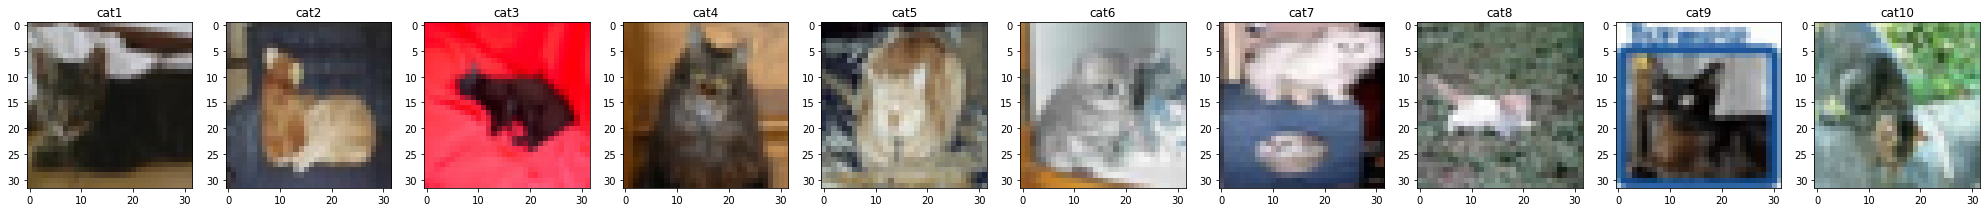

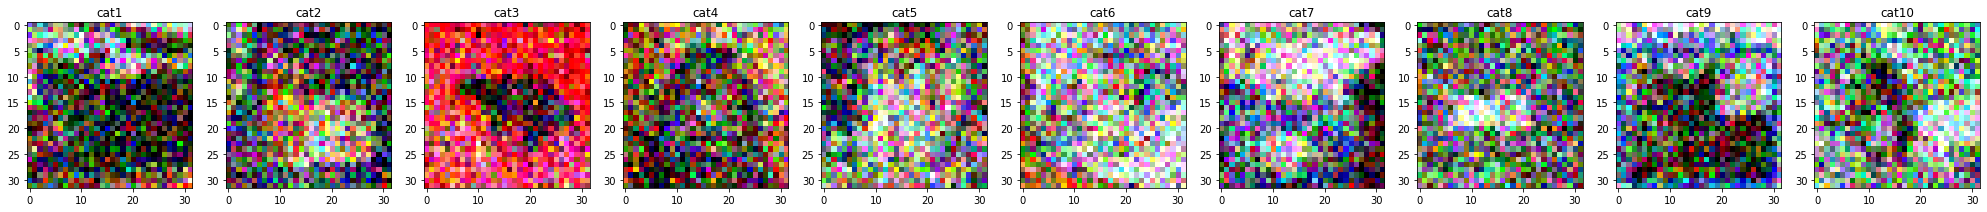

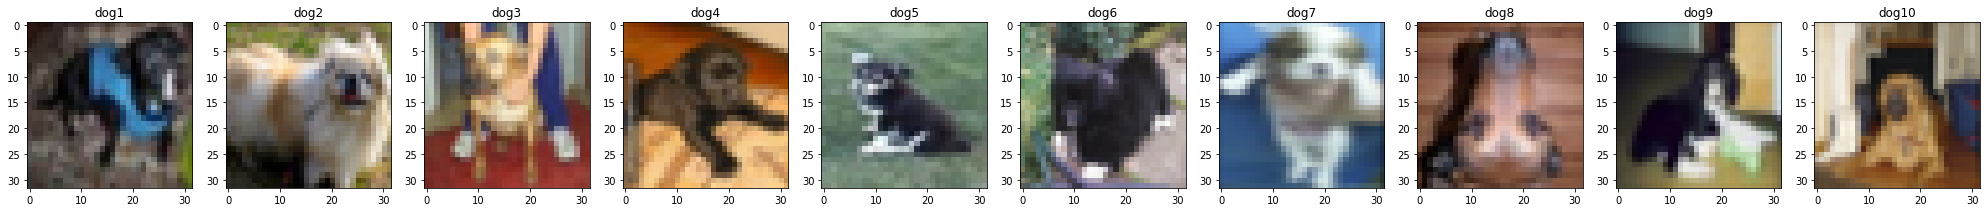

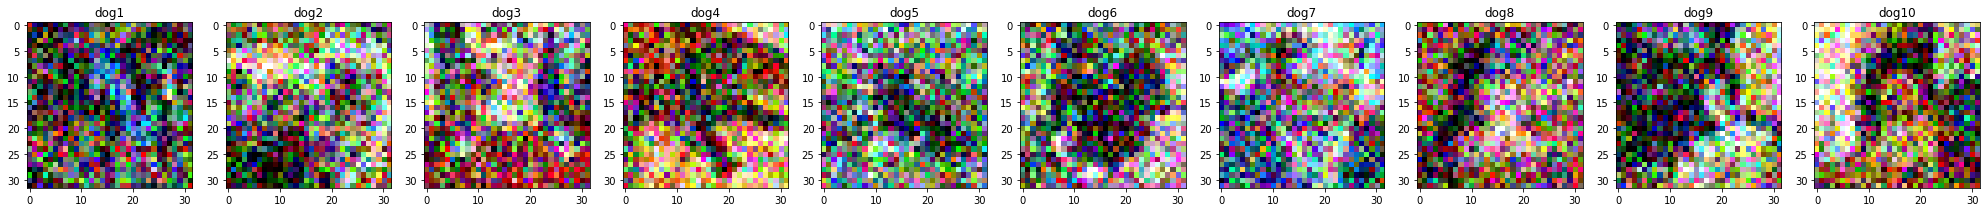

In [4]:
# 1c. Extract subset of dog and cat.

# label of dataset.
label_trainset = np.array(trainset.targets)
label_testset = np.array(testset.targets)

# noisy data (cat, dog)
catDog_noise_trainset = noise_trainset_norm[(label_trainset == 3) | (label_trainset == 5)]
catDog_noise_testset = noise_testset_norm[(label_testset == 3) | (label_testset == 5)]

# original data (cat, dog)
catDog_trainset = train_set[(label_trainset == 3) | (label_trainset == 5)]
catDog_testset = test_set[(label_testset == 3) | (label_testset == 5)]

# label data of both original and noise dataset.
catDog_label_trainset = label_trainset[(label_trainset == 3) | (label_trainset == 5)]
catDog_label_testset = label_testset[(label_testset == 3) | (label_testset == 5)]


# 1d. show noise and original images of dog and cat.
def plot_gallery(n = 1, c = 10, no_label = 3, no_dataset = 1):
    # plot cat or dog.
    class_name = "cat" if no_label == 3 else "dog"
    # plot original or noise.
    name_dataset = catDog_trainset if no_dataset == 1 else catDog_noise_trainset
    
    plt.figure(figsize=(35, 35))
    for i in range(c):
        plt.subplot(n, c, i + 1)
        plt.title(class_name + str(i+1))
        plt.imshow(name_dataset[catDog_label_trainset == no_label][i])  
        
plot_gallery(1, 10, 3, 1)
plot_gallery(1, 10, 3, 2)
plot_gallery(1, 10, 5, 1)
plot_gallery(1, 10, 5, 2)

### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes classifiers: one on the original features (raw pixels), and seven on the seven different PCA features in 2a. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [5]:
# Write the code for your answer here. You can use multiple cells to improve readability.

# 2a & 2b & 2c.

import sklearn
import math
import time
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


# reshape dataset from [n, x, y, z] to [n, x*y*z].
x, y, z = catDog_trainset.shape[1:] 
catDog_trainset_reshape = catDog_trainset.reshape((catDog_trainset.shape[0], x*y*z)) # 10000 by 1024 * 3.
catDog_testset_reshape = catDog_testset.reshape((catDog_testset.shape[0], x*y*z)) # 2000 by 1024 * 3.

# reshape noise_dataset.
catDog_noise_trainset_reshape = catDog_noise_trainset.reshape((catDog_noise_trainset.shape[0], x*y*z)) # 10000 by 1024*3.
catDog_noise_testset_reshape = catDog_noise_testset.reshape((catDog_noise_testset.shape[0], x*y*z)) # 2000 by 1024*3.

# DR trainset and testset.
def train_PCA_model(n_components, train_dataset, test_dataset):
    
    pca_object = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(train_dataset)
    pca_trainset = pca_object.transform(train_dataset)
    pca_testset = pca_object.transform(test_dataset)
    return pca_trainset, pca_testset
 
# using enigenvector from trainset and testset into Naive Bayes model.
def train_test_NB_model(NB_type, train_set, test_set, train_label, test_label):
    # training ...
    train_start_time = time.time()
    model = NB_type()
    model.fit(train_set, train_label)
    train_end_time = time.time()
    train_time = train_end_time - train_start_time
    # testing ...
    test_start_time = time.time()
    
    pred_label = model.predict(test_set) # return predict label.
    pred_prob = model.predict_proba(test_set) # return probability.
    
    # res = metrics.accuracy_score(test_label, pred_label, normalize=True, sample_weight=None) # different from model.score()
    res = model.score(test_set, test_label)
    test_end_time = time.time()
    test_time = test_end_time - test_start_time
    
    return res, pred_label, pred_prob, train_time, test_time


In [6]:
"""
Decide PCs range:
    when n_component is float number within 0 and 1, it means the information that PCA keeps.
    Therefore, let's change the n_component number between 0 and 1 and return the the number of PCs.
"""

inf_rate = [0.99, 0.97, 0.95, 0.93, 0.90]
No_component = list()

for rate in inf_rate:
    pca = PCA(rate).fit(catDog_trainset_reshape)
    inf = pca.transform(catDog_trainset_reshape)
    No_component.append(inf.shape[1])

print(No_component)

# therefore, let's choose 7 different n_components within the range of 87 and 561.

[561, 283, 184, 132, 87]


Without dimension reduction, the accuracy of NB is  0.5935
When n_component is 100 accuracy is  0.591
When n_component is 150 accuracy is  0.574
When n_component is 200 accuracy is  0.5685
When n_component is 250 accuracy is  0.571
When n_component is 300 accuracy is  0.5705
When n_component is 350 accuracy is  0.573
When n_component is 400 accuracy is  0.574
When n_component is 450 accuracy is  0.584


Text(0.5, 1.0, 'Accuracy')

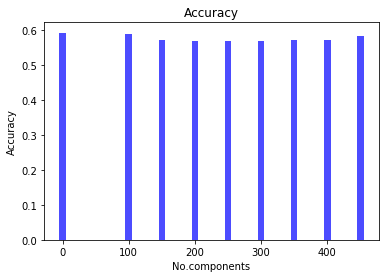

In [7]:
# 2a & 2b & 2c.
"""
In this part, GaussianNB was utilised because multinomialNB and Bernoulli perform better in text classification.
"""
# original features.
raw_res, pred_raw_label, pred_raw_prob, _, _  = train_test_NB_model(GaussianNB, catDog_trainset_reshape, catDog_testset_reshape, catDog_label_trainset, catDog_label_testset)
print("Without dimension reduction, the accuracy of NB is ", raw_res)

# store accuracy.
res_arr = list()

# store predictive label.
pred_label_arr = list()

# store predictive probability.
pred_prob_arr = list()

# store 7 PCs.
pc_arr = [i for i in range(100, 500, 50)]

for i in pc_arr:
    pca_trainset, pca_testset = train_PCA_model(i, catDog_trainset_reshape, catDog_testset_reshape)
    res, pred_label, pred_prob, _, _  = train_test_NB_model(GaussianNB, pca_trainset, pca_testset, catDog_label_trainset, catDog_label_testset)
    res_arr.append(res)
    pred_label_arr.append(pred_label)
    pred_prob_arr.append(pred_prob)
    print("When n_component is "+ str(i) +" accuracy is ", res)
    
# add accuracy without PCA into res_arr.
pc_arr.insert(0, 0)
res_arr.insert(0, raw_res)

plt.bar(pc_arr, res_arr, width = 10, alpha=0.7, color = "blue")
plt.xlabel("No.components")
plt.ylabel("Accuracy")
plt.title("Accuracy")


Without PCA, AUC 0.386
When PC is 100 AUC 0.378
When PC is 150 AUC 0.387
When PC is 200 AUC 0.402
When PC is 250 AUC 0.404
When PC is 300 AUC 0.406
When PC is 350 AUC 0.401
When PC is 400 AUC 0.394
When PC is 450 AUC 0.389


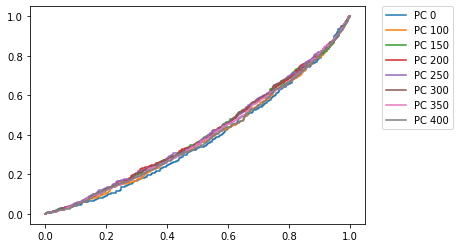

In [8]:
# 2d & 2e.
fpr, tpr, thresholds = metrics.roc_curve(catDog_label_testset, pred_raw_prob[:, 1], pos_label=3) # cat category.
auc = metrics.auc(fpr, tpr) # compute AUC.
print("Without PCA, AUC %.3f" % auc)

for i, pred_prob in enumerate(pred_prob_arr):
    fpr, tpr, thresholds = metrics.roc_curve(catDog_label_testset, pred_prob[:, 1], pos_label=3)
    auc = metrics.auc(fpr, tpr) # compute AUC.
    print("When PC is "+str(pc_arr[i+1])+" AUC %.3f" % auc)
    p = plt.plot(fpr, tpr, label = "PC "+str(pc_arr[i])) # plot ROC.
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


### 2f. observation

Firstly, the result is difference using three different functions including metrics.auc(), metrics.accuracy_score() and model.score(). Comparison: accuracy_score() > model.score() > metrics.auc().

TP：predict 1，true 1, prediction correct.

FP：predict 1，true 0, prediction wrong.

FN：predict 0，true 1, prediction wrong.

TN：predict 0，true 0, prediction correct.

accuracy_score(): Accuracy classification score.  (TP+TN)/(TP+TN+FP+FN). The result is bad when the sample is not balance (skewed sample distribution). For example, there are two categories in sample. Dog and Cat. However, the amount of Dog is far bigger than that of Cat. in this case, the classifier could also perform very well if it can only classify Dog but cannot classify Cat very well.

in-build score model.score(): Returns the **mean accuracy** on the given test data and labels. 

metrics.auc(): TPR  = TP/(TP+FN), and FPR = 1 - TN/(FP+TN). "The implicit goal of AUC is to deal with situations where you have a skewed sample distribution, and don't want to over-fit to a single class."

Conclusion: **AUC is more robust than accuracy**.

Secondly, the performance of Naive Bayes classifier is better when the amount of feature is not very large according to the result of AUC. In the AUC plot, When PC are 250 and 300, AUC could achieve the highest results that are 0.405 and 0.402 respectively. However, after 300, there is a decreasing tendency of auc with the increasing of features. In this case, PC is 100 should be ignored because the features of a category loss very serious. Therefore, we could conclude that **Naive Bayes classifier could perform better in small number of features of a category.**

Thirdly, Naive Bayes classifier might not be a good approach in cat and dog image classification. Undoubtedly, the highest result is about 60%, the highest AUC is 40%. however, we need to notice that "Dog" and "Cat" has a very similar appearnance. In this scenario, this also increase the difficulty of classification.

### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on the three different PCA features in 3b); **four Logistic Regression** classifiers (one on the original features, and three on the three different PCA features in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

Without dimension reduction, the accuracy of NB is  0.591
When n_component is 100 accuracy is  0.5975
When n_component is 150 accuracy is  0.583
When n_component is 200 accuracy is  0.5775
When n_component is 250 accuracy is  0.5545
When n_component is 300 accuracy is  0.557
When n_component is 350 accuracy is  0.5435
When n_component is 400 accuracy is  0.5415
When n_component is 450 accuracy is  0.5385


'\nAccording to the result, the performance of navie bayes in original data is better than that in noisy data.\n'

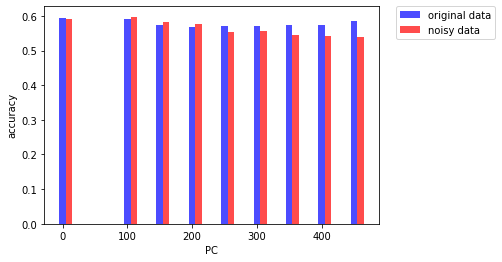

In [9]:
# Write the code for your answer here. You can use multiple cells to improve readability.

# 3a. noisy version.

# original features.
raw_res, *other = train_test_NB_model(GaussianNB, catDog_noise_trainset_reshape, catDog_noise_testset_reshape, catDog_label_trainset, catDog_label_testset)
print("Without dimension reduction, the accuracy of NB is ", raw_res)

# train PCA, NB and plot.
res_noise_arr = list()
pc_arr = [i for i in range(100, 500, 50)]
for i in pc_arr:
    pca_noise_trainset, pca_noise_testset = train_PCA_model(i, catDog_noise_trainset_reshape, catDog_noise_testset_reshape)
    res, *other = train_test_NB_model(GaussianNB, pca_noise_trainset, pca_noise_testset, catDog_label_trainset, catDog_label_testset)
    res_noise_arr.append(res)
    print("When n_component is "+ str(i) +" accuracy is ", res)

pc_arr.insert(0, 0)
res_noise_arr.insert(0, raw_res)

# plot comparison.
plt.bar(pc_arr, res_arr, width = 10, alpha=0.7, color = "blue", label = "original data")
plt.bar(np.array(pc_arr)+10, res_noise_arr, width = 10, alpha=0.7, color = "red", label = "noisy data")
plt.xlabel("PC")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

"""
According to the result, the performance of navie bayes in original data is better than that in noisy data.
"""

In [10]:
total_trainset_reshape = train_set.reshape((train_set.shape[0], x*y*z))
total_testset_reshape = test_set.reshape((test_set.shape[0], x*y*z))

In [11]:
# decide PC values.

inf_rate = [0.99, 0.97, 0.95, 0.93, 0.90]
total_no_component = list()

for rate in inf_rate:
    pca = PCA(rate).fit(total_trainset_reshape)
    inf = pca.transform(total_trainset_reshape)
    total_no_component.append(inf.shape[1])

print(total_no_component)

# According to the result, 335, 217, 153 were choosed as three PCs values.

[658, 335, 217, 153, 99]


In [12]:
# 3b & 3c.
# define Logistic Regression training and testing function.
def train_test_LR_model(train_set, test_set, train_label, test_label):
    # training time.
    train_start_time = time.time()
    LR_object = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(train_set, train_label)
    train_end_time = time.time()
    train_time = train_end_time - train_start_time
    
    # testing time.
    test_start_time = time.process_time()
    pred_label = LR_object.predict(test_set)
    res = LR_object.score(test_set, test_label)
    # res = metrics.accuracy_score(test_label, pred_label, normalize=True, sample_weight=None)
    test_end_time = time.process_time()
    test_time = test_end_time - test_start_time
    return res, pred_label, train_time, test_time

In [13]:
# 3b & 3c.
from sklearn.linear_model import LogisticRegression

# define a vector for storing all n_components.
PC_arr = [153, 217, 335]

# store accuracy of naive bayes and logistic regression respectively.
res_NB_arr = list()
res_LR_arr = list()

# Naive Bayes and logistic regression classifier without PCA.
res_raw_NB, pred_raw_NB_label, _, *time_raw_NB = train_test_NB_model(GaussianNB, total_trainset_reshape, total_testset_reshape, label_trainset, label_testset)
print("accuracy of naive bayes is ", res_raw_NB)
res_raw_LR, pred_raw_LR_label, *time_raw_LR = train_test_LR_model(total_trainset_reshape, total_testset_reshape, label_trainset, label_testset)
print("accuracy of logistic regression is ", res_raw_LR)

res_NB_arr.append(res_raw_NB)
res_LR_arr.append(res_raw_LR)

# store train test time.
NB_time_arr = list()
LR_time_arr = list()
pred_PCA_NB_label = list()
pred_PCA_LR_label = list()

# Naive Bayes and logistic regression classifier with PC 335, 217, 153.
for i in PC_arr:
    # 1. PCA for DR.
    pca_total_trainset, pca_total_testset = train_PCA_model(i, total_trainset_reshape, total_testset_reshape)
    
    # 2. three naive bayes.
    res_NB, pred_NB_label, _, train_NB_time, test_NB_time = train_test_NB_model(GaussianNB, pca_total_trainset, pca_total_testset, label_trainset, label_testset)
    print("when PC is "+str(i)+", the accuracy of naive bayes is ", res_NB)
    
    # 3. three Logistic regression.
    res_LR, pred_LR_label,train_LR_time, test_LR_time = train_test_LR_model(pca_total_trainset, pca_total_testset, label_trainset, label_testset)
    print("When PC is "+str(i)+", the accuracy of logistic regression is ", res_LR)
    
    res_NB_arr.append(res_NB)
    res_LR_arr.append(res_LR)
    NB_time_arr.append([train_NB_time, test_NB_time])
    LR_time_arr.append([train_LR_time, test_NB_time])
    pred_PCA_NB_label.append(pred_NB_label)
    pred_PCA_LR_label.append(pred_LR_label)
    

accuracy of naive bayes is  0.2976


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


accuracy of logistic regression is  0.4063
when PC is 153, the accuracy of naive bayes is  0.32
When PC is 153, the accuracy of logistic regression is  0.4019
when PC is 217, the accuracy of naive bayes is  0.3132
When PC is 217, the accuracy of logistic regression is  0.4075
when PC is 335, the accuracy of naive bayes is  0.3022
When PC is 335, the accuracy of logistic regression is  0.4084


In [14]:
# train NN.
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

batchsize = 8
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize, shuffle=True, num_workers=2)

# 1. Define a Convolutional Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

# 2. Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train_start_time = time.time()


# 3. Train the network
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            

train_end_time = time.time()
train_NN_time = train_end_time - train_start_time

[1,  2000] loss: 2.298
[1,  4000] loss: 2.087
[1,  6000] loss: 1.920
[2,  2000] loss: 1.745
[2,  4000] loss: 1.617
[2,  6000] loss: 1.523
[3,  2000] loss: 1.459
[3,  4000] loss: 1.421
[3,  6000] loss: 1.405
[4,  2000] loss: 1.332
[4,  4000] loss: 1.333
[4,  6000] loss: 1.300
[5,  2000] loss: 1.243
[5,  4000] loss: 1.228
[5,  6000] loss: 1.236


In [15]:
# test NN.
batchsize = 1
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize, shuffle=False, num_workers=2)

test_start_time = time.time()
correct = 0
total = 0
test_NN_label_arr = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        test_NN_label_arr.append(predicted.item())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    res_NN = correct / total
    
test_end_time = time.time()
test_NN_time = test_end_time - test_start_time
print('Accuracy of the network on the 10000 test images: ', res_NN)

Accuracy of the network on the 10000 test images:  0.5662


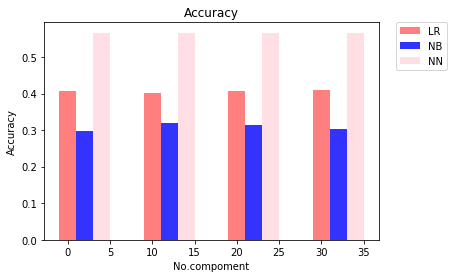

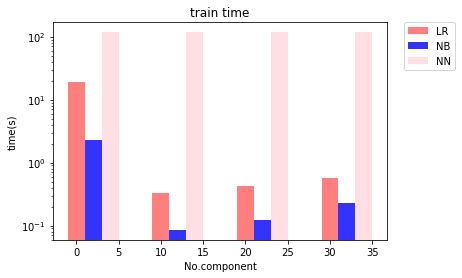

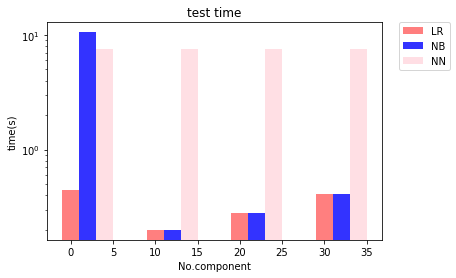

In [16]:
# 3d.

# plot accuracy. PC_arr = [153, 217, 335]
x_arr = [0, 10, 20, 30]
NN_arr = [res_NN for i in x_arr]

plt.bar(x_arr, res_LR_arr, color = "red", alpha = 0.5, width = 2, label = "LR")
plt.bar(np.array(x_arr)+2, res_NB_arr, color = "blue", alpha = 0.8, width = 2, label = "NB")
plt.bar(np.array(x_arr)+4, NN_arr, color = "pink", alpha = 0.5, width = 2, label = "NN")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("No.compoment")
plt.ylabel("Accuracy")
plt.title("Accuracy")

# trainting and testing time list.

train_NB_time = [i[0] for i in NB_time_arr]
train_NB_time.insert(0, time_raw_NB[0])

test_NB_time = [i[1] for i in NB_time_arr]
test_NB_time.insert(0, time_raw_NB[1])

train_LR_time = [i[0] for i in LR_time_arr]
train_LR_time.insert(0, time_raw_LR[0])

test_LR_time = [i[1] for i in LR_time_arr]
test_LR_time.insert(0, time_raw_LR[1])

NN_train = [train_NN_time for i in x_arr]
NN_test = [test_NN_time for i in x_arr]

# plot train time.
plt.figure()
plt.bar(x_arr, train_LR_time, width = 2, color = "red", alpha = 0.5, label = "LR")
plt.bar(np.array(x_arr)+2, train_NB_time, width = 2, color = "blue", alpha = 0.8, label = "NB")
plt.bar(np.array(x_arr)+4, NN_train, width = 2, color = "pink", alpha = 0.5, label = "NN")
plt.yscale('log')
plt.title("train time")
plt.xlabel("No.component")
plt.ylabel("time(s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# plot test time.
plt.figure()
plt.bar(np.array(x_arr), test_LR_time, width = 2, color = "red", alpha = 0.5, label = "LR")
plt.bar(np.array(x_arr)+2, test_NB_time, width = 2, color = "blue", alpha = 0.8, label = "NB")
plt.bar(np.array(x_arr)+4, NN_test, width = 2, color = "pink", alpha = 0.5, label = "NN")
plt.yscale('log')
plt.title("test time")
plt.xlabel("No.component")
plt.ylabel("time(s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [17]:
# 3e. confusion matrix.
from sklearn.metrics import confusion_matrix
import seaborn as sns # for statistical data visualization.

# define plot function.
def plot_confusion_matrix(pred_label, title):
    mat = confusion_matrix(testset.targets, pred_label)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
                xticklabels=np.unique(trainset.targets), yticklabels=np.unique(trainset.targets))
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title(title)
    return mat

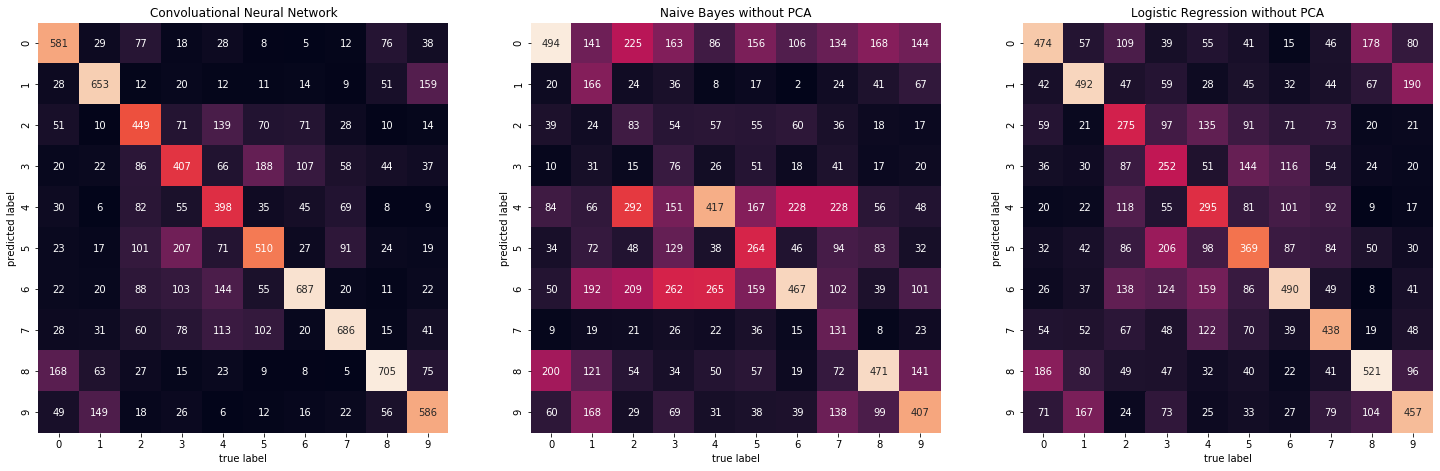

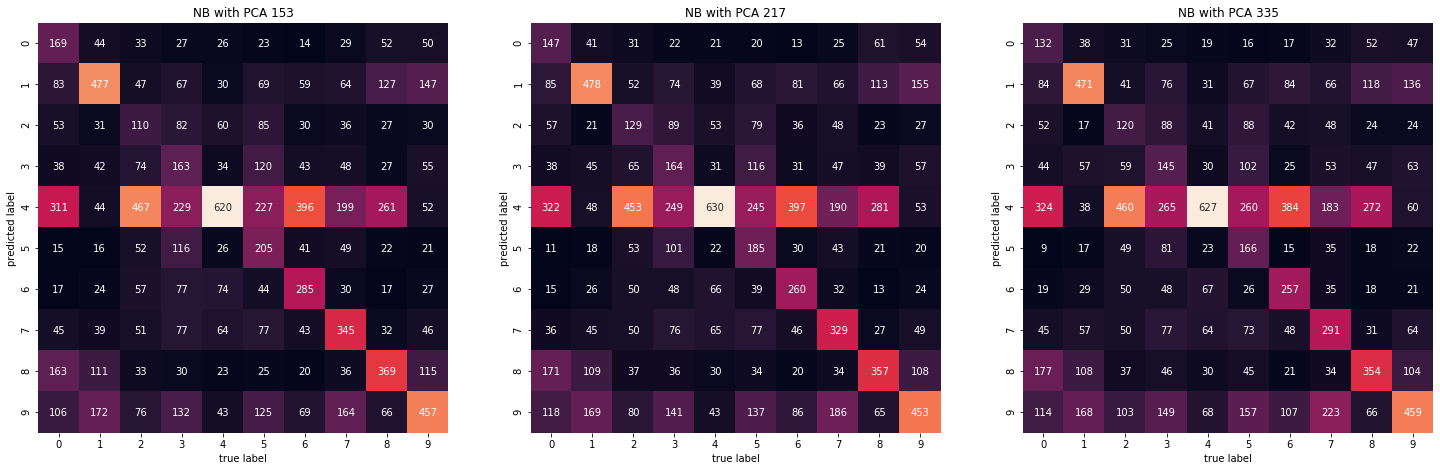

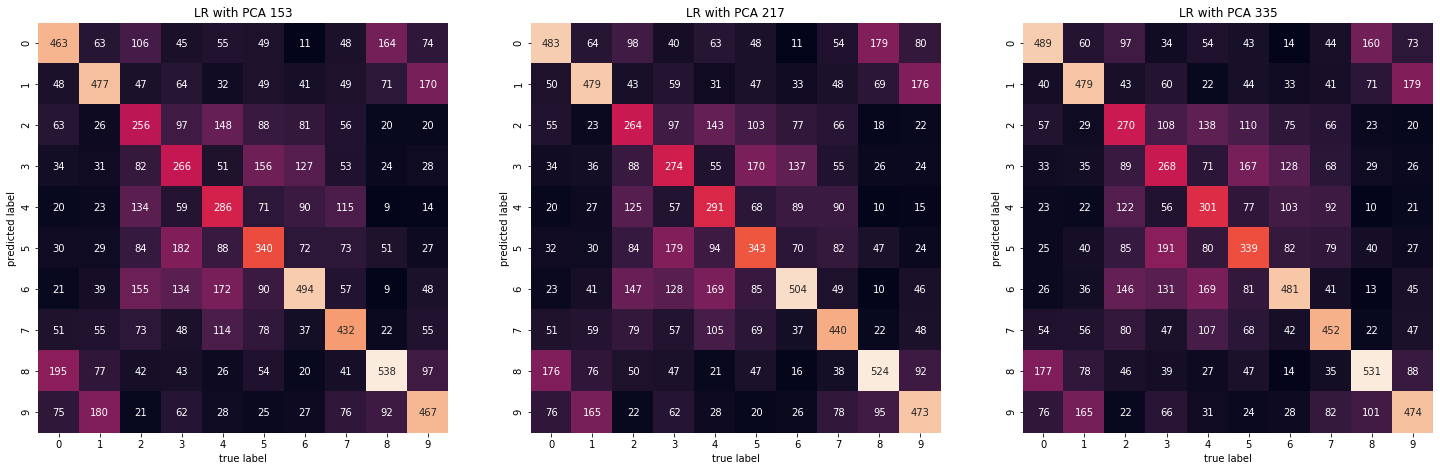

In [18]:
# plot confusion matrix.

plt.figure(figsize = (25, 25))
plt.subplot(1, 3, 1)
mat_NN = plot_confusion_matrix(test_NN_label_arr, "Convoluational Neural Network")
plt.subplot(1, 3, 2)
mat_raw_NB = plot_confusion_matrix(pred_raw_NB_label, "Naive Bayes without PCA")
plt.subplot(1, 3, 3)
mat_raw_LR = plot_confusion_matrix(pred_raw_LR_label, "Logistic Regression without PCA")

plt.figure(figsize = (25, 25))
for i in range(len(pred_PCA_NB_label)):
    plt.subplot(1, 3, i+1)
    mat_PCA_NB = plot_confusion_matrix(pred_PCA_NB_label[i], "NB with PCA "+str(PC_arr[i]))

plt.figure(figsize = (25, 25))
for i in range(len(pred_PCA_LR_label)):
    plt.subplot(1, 3, i+1)
    mat_PCA_LR = plot_confusion_matrix(pred_PCA_LR_label[i], "LR with PCA "+str(PC_arr[i]))



### 3f. observation

Firstly, according to confusion matrix, logistic regression perform better than Naive Bayes. Obviously, the confusion matrix of logistic regression is more symmtric. Moreover, **the majority mistake of Naive Bayes classifier is in the fourth category.** 

Secondly, the comparison of performance of three algorithms. **Neuronal network is better than Logistic regression whose performance is better than Naive Bayes.** To be more specific, **NN could get better performance based on longer training time and more complicated architecture.** As for LR and NB, LR and NB are more time consuming without dimension reduction compared with them using PCA. In this scenario, there is an increasing tendency of training and testing time with the increasing of features.

Thirdly, **the performance of naive bayes in original dataset is more stable than that in noise dataset**. Without PCA, the performace of NB on original dataset is similar to that of NB on noise dataset. However, with the increasing of  features, the performance of NB on noise dataset is decreasing.

### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [19]:
# Write the code for your answer here. You can use multiple cells to improve readability.

# train_set, test_set, noise_trainset_norm, noise_testset_norm.
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor

# 4a & 4b.

# reshape dataset for meeting the shape of TensorDataset.
noise_trainset_norm_reshape = noise_trainset_norm.reshape((-1, z, x, y))
noise_testset_norm_reshape = noise_testset_norm.reshape((-1, z, x, y))

raw_trainset_reshape = train_set.reshape((-1, z, x, y))
raw_testset_reshape = test_set.reshape((-1, z, x, y))

label_trainset_reshape = label_trainset.reshape((label_trainset.shape[0], 1))

clean_noise_trainset = TensorDataset(Tensor(raw_trainset_reshape), noise_trainset_norm_reshape)

In [20]:
# define Autoencoder architecture.
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 8 output channel, 3x3 square convolution
            nn.Conv2d(3, 8, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [21]:
# define training function.
def training_autoencoder(myAE, loss_function = nn.MSELoss, optimiser = torch.optim.Adam, batch_size = 64, learning_rate = 0.05, max_epochs = 2):  
    # Choose loss.
    criterion = loss_function() 
    # Choose optimiser.
    optimizer = optimiser(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
    # dataloader.
    train_dataloader = DataLoader(clean_noise_trainset, batch_size = batch_size, shuffle = True)
    # Storage 
    outputs = []
    loss_arr = []
    # training time.
    train_start_time = time.time()
    # Start training...
    for epoch in range(max_epochs):
        for data in train_dataloader:

            img_raw, img_noise = data

            img_raw = img_raw.float()
            img_noise = img_noise.float()

            optimizer.zero_grad()
            recon_noise = myAE(img_noise) # feed noise image in.
            loss = criterion(recon_noise, img_raw) # calculate loss between recon image and clean image.
            loss.backward()
            optimizer.step()   
            outputs.append([epoch, img_raw, img_noise, recon_noise])
          
        loss_arr.append(loss.item()) 
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
        
    train_end_time = time.time()
    training_time = train_end_time - train_start_time
    
    return training_time, loss_arr
    

In [22]:
# Hyperparameters for training.
batch_size=8
learning_rate=0.001
max_epochs = 10
myAE=Autoencoder()

training_time, loss_train = training_autoencoder(myAE, nn.MSELoss, torch.optim.Adam, batch_size, learning_rate, max_epochs)
print("training time ", training_time)

Epoch:1, Loss:0.0185
Epoch:2, Loss:0.0144
Epoch:3, Loss:0.0154
Epoch:4, Loss:0.0116
Epoch:5, Loss:0.0126
Epoch:6, Loss:0.0120
Epoch:7, Loss:0.0121
Epoch:8, Loss:0.0104
Epoch:9, Loss:0.0103
Epoch:10, Loss:0.0124
training time  634.3633518218994


In [23]:
# 4c.
# define test autoencoder function.
def test_autoencoder(test_clean_loader, test_noise_loader, myAE):
    
    #Choose mean square error loss.
    criterion = nn.MSELoss() 

    #Start testing...
    test_start_time = time.time()
    
    loss_recon = dict() # key: loss value: reconstructed image.
    loss_noise = dict() # key: loss value: noisy original image.
    total_loss = 0 
    
    for data_noise, data_clean in zip(test_noise_loader, test_clean_loader):
        img_clean, _ = data_clean
        img_noise, _ = data_noise
        img_clean = img_clean.float()
        img_noise = img_noise.float()
        # model is copied from trained model.
        recon_noise = myAE(img_clean)
        loss = criterion(recon_noise, img_clean)
        loss = loss.item()
        
        total_loss += loss
        loss_recon[loss] = recon_noise
        loss_noise[loss] = img_noise
        
    test_end_time = time.time()
    test_time = test_end_time - test_start_time
    print("testing is finish.")
    return loss_recon, loss_noise, test_time, total_loss


In [24]:
# noise testset and loader.
noise_testset = TensorDataset(noise_testset_norm_reshape, Tensor(label_testset))
test_noise_loader = DataLoader(noise_testset, batch_size=1)

# clean testset and loader.
clean_testset = TensorDataset(Tensor(raw_testset_reshape), Tensor(label_testset))
test_clean_loader = DataLoader(clean_testset, batch_size=1)
    
loss_recon, loss_noise, test_time, loss_test = test_autoencoder(test_clean_loader, test_noise_loader, myAE)
print("testing time is ", test_time)
print("testing loss is ", loss_test)

testing is finish.
testing time is  10.061569929122925
testing loss is  97.3598914135946


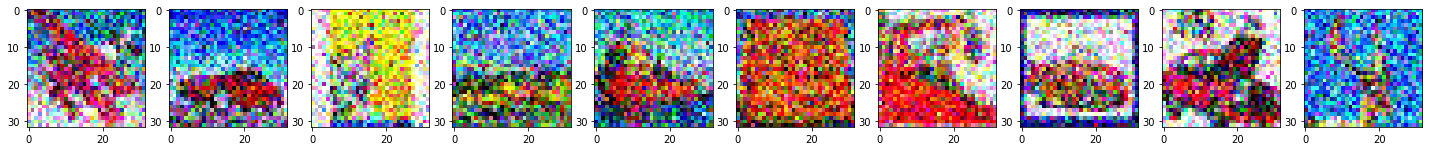

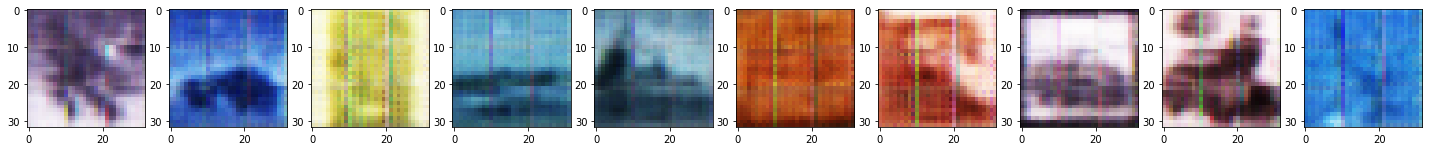

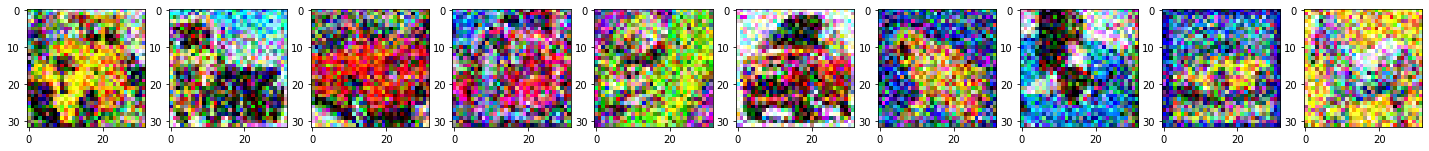

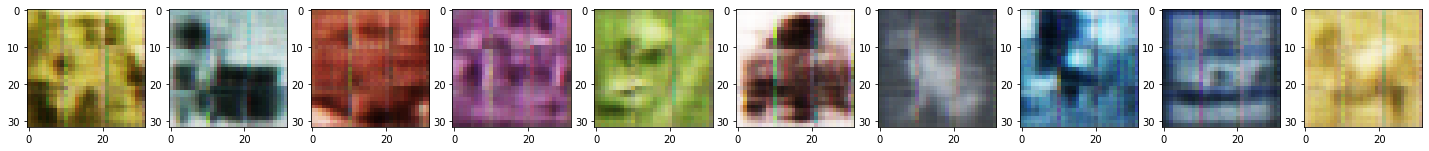

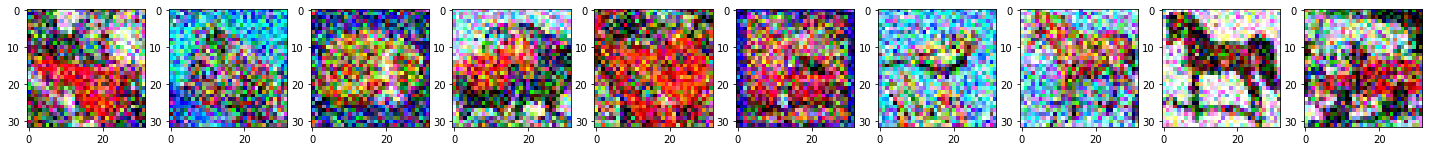

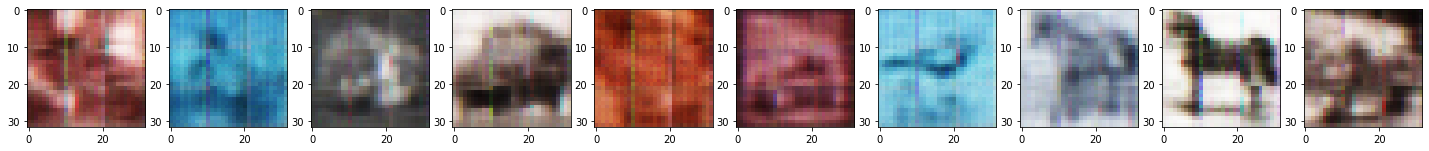

In [25]:
loss_index_30 = sorted(loss_recon.keys() ,reverse = True)[:30]

def plot_loss_gallery(arr, des):
    plt.figure(figsize = (25, 25))
    dic = loss_noise if des == "noise" else loss_recon
    for i, loss in enumerate(arr):
        img = dic[loss].detach().numpy().reshape((x, y, z))
        plt.subplot(1, 10, i+1)
        plt.imshow(img)
    
plot_loss_gallery(loss_index_30[:10], "noise")
plot_loss_gallery(loss_index_30[:10], "recon")

plot_loss_gallery(loss_index_30[10:20], "noise")
plot_loss_gallery(loss_index_30[10:20], "recon")

plot_loss_gallery(loss_index_30[20:], "noise")
plot_loss_gallery(loss_index_30[20:], "recon")

In [51]:
# 4d. choose hyperparameter 1.learning rate 2. batch_size.
# 1. learning rate.
learning_rate = [0.001, 0.01, 0.1]
training_loss_arr = []

for i, lr in enumerate(learning_rate):
    print("--------------------- learning rate is", lr, " -----------------")
    # training.
    torch.manual_seed(1713970)
    MYAE = "myAE" + str(i)
    MYAE = Autoencoder()
    training_time, training_loss = training_autoencoder(MYAE, nn.MSELoss, torch.optim.SGD, 8, lr, 5)
    print("training time is ", training_time)
    training_loss_arr.append(training_loss)


--------------------- learning rate is 0.001  -----------------
Epoch:1, Loss:0.0790
Epoch:2, Loss:0.0690
Epoch:3, Loss:0.0647
Epoch:4, Loss:0.0829
Epoch:5, Loss:0.0624
training time is  220.55759000778198
testing is finish.
Testing loss is  625.5966930058785
--------------------- learning rate is 0.01  -----------------
Epoch:1, Loss:0.0826
Epoch:2, Loss:0.0707
Epoch:3, Loss:0.0516
Epoch:4, Loss:0.0594
Epoch:5, Loss:0.0438
training time is  206.85900378227234
testing is finish.
Testing loss is  624.7714561871253
--------------------- learning rate is 0.1  -----------------
Epoch:1, Loss:0.0679
Epoch:2, Loss:0.0537
Epoch:3, Loss:0.0607
Epoch:4, Loss:0.0627
Epoch:5, Loss:0.0737
training time is  208.95977425575256
testing is finish.
Testing loss is  624.8820838816464


Text(0, 0.5, 'error')

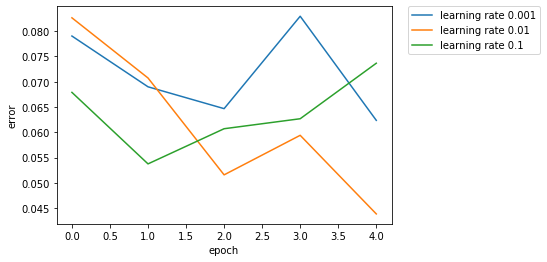

In [58]:
# plot tendency between epoch and error.

x = [0, 1, 2, 3, 4]
plt.plot(x, training_loss_arr[0], label = "learning rate 0.001")
plt.plot(x, training_loss_arr[1], label = "learning rate 0.01")
plt.plot(x, training_loss_arr[2], label = "learning rate 0.1")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("epoch")
plt.ylabel("error")

In [61]:
# 2. batch_size. 
batch_size = [10, 50, 200, 500, 1000]
training_loss_batch = []
training_time_batch = []
for i in batch_size:
    print("------------------ when batch size is ", i, " -----------------")
    # training.
    torch.manual_seed(1713970)
    MYAE = "myAE" + str(i)
    MYAE = Autoencoder()
    training_time, training_loss = training_autoencoder(myAE, nn.MSELoss, torch.optim.SGD, i, 0.005, 5)
    print("training time is ", training_time)
    training_loss_batch.append(training_loss)
    training_time_batch.append(training_time)
    

------------------ when batch size is  10  -----------------
Epoch:1, Loss:0.0091
Epoch:2, Loss:0.0126
Epoch:3, Loss:0.0112
Epoch:4, Loss:0.0142
Epoch:5, Loss:0.0088
training time is  315.3236520290375
------------------ when batch size is  50  -----------------
Epoch:1, Loss:0.0098
Epoch:2, Loss:0.0118
Epoch:3, Loss:0.0105
Epoch:4, Loss:0.0104
Epoch:5, Loss:0.0099
training time is  248.15920090675354
------------------ when batch size is  200  -----------------
Epoch:1, Loss:0.0102
Epoch:2, Loss:0.0104
Epoch:3, Loss:0.0108
Epoch:4, Loss:0.0106
Epoch:5, Loss:0.0108
training time is  233.87854290008545
------------------ when batch size is  500  -----------------
Epoch:1, Loss:0.0103
Epoch:2, Loss:0.0106
Epoch:3, Loss:0.0104
Epoch:4, Loss:0.0105
Epoch:5, Loss:0.0105
training time is  241.67513298988342
------------------ when batch size is  1000  -----------------
Epoch:1, Loss:0.0103
Epoch:2, Loss:0.0105
Epoch:3, Loss:0.0105
Epoch:4, Loss:0.0104
Epoch:5, Loss:0.0104
training time is  2

Text(0, 0.5, 'training time')

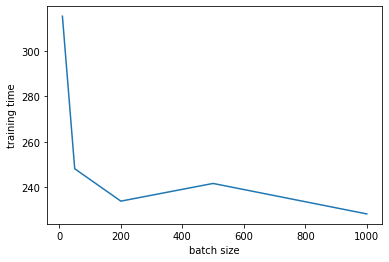

In [76]:
# training_time_batch

plt.plot(batch_size, training_time_batch)
plt.xlabel("batch size")
plt.ylabel("training time")

### 4e. observation

Firstly, according to the plot of learning rate, **if lr is too small (blue line), model needs more time to converge.** **If lr is too large(green line), model might not be converged**. Therefore, a moderate learning rate might be near 0.01. 

Secondly, there is an obvious relationship between **batch size and training time**. To be more specific, bigger batch size could decrease the training time. If the batch size is too small, model needs more training time. however, in my opinion, the batch size only has a little effect on training time. The most significant factor is CPU or GPU. If CPU or GPU is more powerful. it must save more training time.